In this dataset, a value of 1 indicates that the applicant is at high risk of defaulting, while 0 indicates that the loan is likely to be approved. The main goal is to predict the likelihood of loan repayment based on applicant and loan characteristics, helping banks and financial institutions make informed lending decisions and reduce financial risk.

The dataset used here was generated synthetically by ChatGPT to mimic real credit application data and does not contain actual applicant information.

Objectives:

Risk Assessment: Identify high-risk applicants who may default on loans.

Decision Support: Assist banks in approving or rejecting loans using data-driven predictions.

Optimizing Lending Policies: Adjust lending criteria based on predicted default probabilities.

Minimizing Losses: Reduce financial loss from non-repayment of loans.



In [250]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [251]:
#load the dataset

Credit_risk_data=pd.read_csv("credit_risk_south_africa_large.csv")

#features

X_features=['Age', 'Gender', 'Income', 'CoapplicantIncome', 'LoanAmount', 'LoanTerm', 'CreditScore', 'EmploymentStatus', 'MaritalStatus', 'PropertyArea']

#selected features to use for the training

#X_selected_features = ['Income', 'CoapplicantIncome', 'LoanAmount', 'LoanTerm', 'CreditScore', 'EmploymentStatus']

#X_train and y_train

X_train=Credit_risk_data[X_features]
#X_train=Credit_risk_data[X_selected_features]
y_train=Credit_risk_data['Output']

#number of training examples and features

m, n = X_train.shape
print(f"The number of training examples is ={m}")
print(f"The number of features is ={n}")

#show the first 5 training examples

print(f"The first 5 training examples are ={X_train[:5]}")

#show the first 5 target values

print(f"The first 5 target values ={y_train[:5]}")

The number of training examples is =10000
The number of features is =10
The first 5 training examples are =   Age  Gender  Income  CoapplicantIncome  LoanAmount  LoanTerm  CreditScore  \
0   56    Male   69158              30089      649711       285          577   
1   46  Female   40286              21348       65851        55          462   
2   32  Female   31533               5877       49566        93          649   
3   60  Female   20316              43488      750129        26          330   
4   25    Male   10699              18904      400927       237          757   

  EmploymentStatus MaritalStatus PropertyArea  
0    Self-employed       Married    Semiurban  
1         Employed      Divorced        Urban  
2         Employed       Widowed        Urban  
3    Self-employed      Divorced        Rural  
4         Employed      Divorced        Rural  
The first 5 target values =0    0
1    0
2    0
3    1
4    0
Name: Output, dtype: int64


In [252]:
#some of my data are non numeric, so we must encode them into numbers for the model

X_train_encoded = pd.get_dummies(X_train, columns=['Gender', 'EmploymentStatus', 'MaritalStatus', 'PropertyArea'])
#X_train_encoded = pd.get_dummies(X_train, columns=['EmploymentStatus'])
X_train_encoded=X_train_encoded.astype(int)

m, n = X_train_encoded.shape
print(f"The number of training examples is ={m}")
print(f"The number of features is ={n}")

#show the first 5 training examples after encoding

print(f"The first 5 training examples after encoding are ={X_train_encoded[:5]}")


The number of training examples is =10000
The number of features is =18
The first 5 training examples after encoding are =   Age  Income  CoapplicantIncome  LoanAmount  LoanTerm  CreditScore  \
0   56   69158              30089      649711       285          577   
1   46   40286              21348       65851        55          462   
2   32   31533               5877       49566        93          649   
3   60   20316              43488      750129        26          330   
4   25   10699              18904      400927       237          757   

   Gender_Female  Gender_Male  EmploymentStatus_Employed  \
0              0            1                          0   
1              1            0                          1   
2              1            0                          1   
3              1            0                          0   
4              0            1                          1   

   EmploymentStatus_Self-employed  EmploymentStatus_Unemployed  \
0                 

Text(0, 0.5, 'Output')

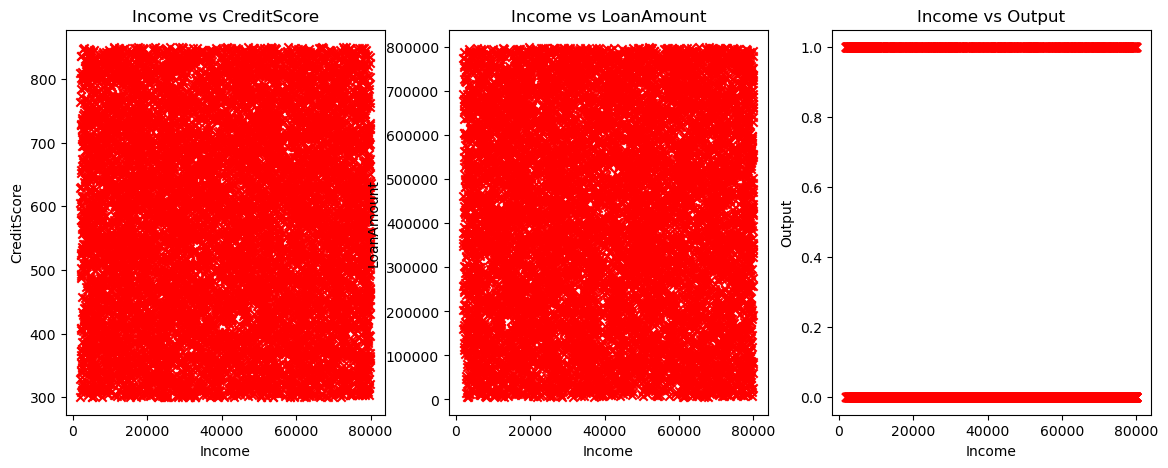

In [253]:
# Let's plot the data to see what they look like
#only few features are plotted

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

axes[0].scatter(X_train_encoded["Income"], X_train_encoded["CreditScore"], marker='x', c='r')
axes[0].set_title("Income vs CreditScore")
axes[0].set_xlabel("Income")
axes[0].set_ylabel("CreditScore")

axes[1].scatter(X_train_encoded["Income"], X_train_encoded["LoanAmount"], marker='x', c='r')
axes[1].set_title("Income vs LoanAmount")
axes[1].set_xlabel("Income")
axes[1].set_ylabel("LoanAmount")


axes[2].scatter(X_train_encoded["Income"], y_train, marker='x', c='r')
axes[2].set_title("Income vs Output")
axes[2].set_xlabel("Income")
axes[2].set_ylabel("Output")

In [254]:
#Let us normalize the data since they are not all of the same scale

def z_normalization(X):
    mu=np.mean(X, axis=0)
    sigma=np.std(X, axis=0)
    X_norm=(X-mu)/sigma
    return X_norm, mu, sigma

In [255]:
X_norm, X_mu, X_sigma=z_normalization(X_train_encoded)
print(f"mu={X_mu}, sigma={X_sigma}, X_norm={X_norm}")

mu=Age                                   41.5576
Income                             40749.7293
CoapplicantIncome                  24754.3861
LoanAmount                        406364.6844
LoanTerm                             183.8642
CreditScore                          573.5518
Gender_Female                          0.5002
Gender_Male                            0.4998
EmploymentStatus_Employed              0.3363
EmploymentStatus_Self-employed         0.3275
EmploymentStatus_Unemployed            0.3362
MaritalStatus_Divorced                 0.2509
MaritalStatus_Married                  0.2534
MaritalStatus_Single                   0.2482
MaritalStatus_Widowed                  0.2475
PropertyArea_Rural                     0.3299
PropertyArea_Semiurban                 0.3317
PropertyArea_Urban                     0.3384
dtype: float64, sigma=Age                                   13.748894
Income                             22632.662667
CoapplicantIncome                  14514.885805
Loa

Text(0, 0.5, 'Output')

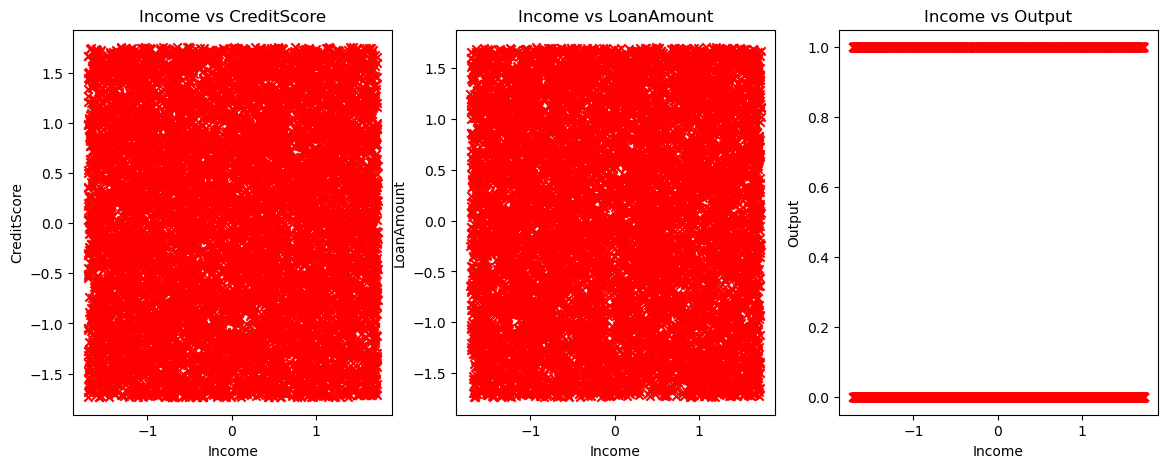

In [256]:
# Let's plot the data to see what they look like
#only few features are plotted

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

axes[0].scatter(X_norm["Income"], X_norm["CreditScore"], marker='x', c='r')
axes[0].set_title("Income vs CreditScore")
axes[0].set_xlabel("Income")
axes[0].set_ylabel("CreditScore")

axes[1].scatter(X_norm["Income"], X_norm["LoanAmount"], marker='x', c='r')
axes[1].set_title("Income vs LoanAmount")
axes[1].set_xlabel("Income")
axes[1].set_ylabel("LoanAmount")


axes[2].scatter(X_norm["Income"], y_train, marker='x', c='r')
axes[2].set_title("Income vs Output")
axes[2].set_xlabel("Income")
axes[2].set_ylabel("Output")

In [257]:
# Convert features and target to NumPy

X_norm_np = X_norm.to_numpy()    
y_norm_np = y_train.to_numpy()  

m, n = X_norm_np.shape
print(f"The number of training examples is ={m}")
print(f"The number of features is ={n}")

#show the first training example

print(f"The first training example is ={X_norm_np[:2]}")

#show the first target value

print(f"The first target value is ={y_norm_np[:2]}")

The number of training examples is =10000
The number of features is =18
The first training example is =[[ 1.05044087  1.25518907  0.3675271   1.05313842  0.98823107  0.02187836
  -1.00040008  1.00040008 -0.71183203  1.4329812  -0.71167258 -0.57873591
   1.71648767 -0.57457897 -0.57350122 -0.70165132  1.41942678 -0.71518341]
 [ 0.32310963 -0.02048938 -0.23468225 -1.47365307 -1.25917436 -0.707781
   0.99960008 -0.99960008  1.4048258  -0.69784586 -0.71167258  1.72790383
  -0.58258502 -0.57457897 -0.57350122 -0.70165132 -0.70450975  1.39824273]]
The first target value is =[0 0]


In [258]:
#define the sigmoid function

def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [259]:
# The gradient can be defined as follows from the mathematical formula:
m, n = X_norm_np.shape
def gradient(X, y, w, b):
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range(m):
        f=sigmoid(np.dot(X[i], w)+b)
        err= f - y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+(err)*X[i, j]
        dj_db=dj_db+err
    dj_dw_total=dj_dw/m
    dj_db_total=dj_db/m
    return dj_dw_total, dj_db_total

In [260]:
# Compute gradient descent
# w_in and b_in represent the initial parameter values
# Remember w_in is a vector here
# alpha represents the learning rate
# num_iterations represents the number of iterations

def gradient_descent(X, y, w_in, b_in, alpha, num_iterations, gradient):
    #w=copy.deepcopy(w_in) 
    w=w_in
    b=b_in
    for i in range(num_iterations):
      #Compute the gradient and update the parameters using the gradient function  
      dj_dw_total, dj_db_total=gradient(X, y, w, b)

      w=w-alpha*dj_dw_total
      b=b-alpha*dj_db_total
    return w, b

In [261]:
b_in = 0
w_in = np.zeros((n,))
num_iterations = 1000
alpha = 1.0e-1
# run gradient descent
w_final, b_final = gradient_descent(X_norm_np, y_norm_np, w_in, b_in, alpha, num_iterations, gradient)
print(f"The best values of w and b for the logistic regression are:{w_final:} and {b_final:}")
#Income  CoapplicantIncome  LoanAmount  LoanTerm  Employed  Self-employed Unemployed

The best values of w and b for the logistic regression are:[-6.02468854e-03 -2.58352785e-01 -8.82381949e-03  4.18981117e-01
  1.46954583e-02 -6.79179200e-01 -4.27871523e-03  4.27871523e-03
 -6.11504760e-02 -8.79012289e-02  1.48478087e-01 -2.73137510e-02
  1.86620715e-02  8.72764606e-03 -1.06416363e-04  1.24323340e-02
  2.64725479e-02 -3.86953515e-02] and -0.9378628691298982


In [262]:
def predict(X, w, b):
    f_predict = 1 / (1 + np.exp(-(np.dot(X, w) + b)))
    return f_predict

In [263]:
fpredict=predict(X_norm_np, w_final, b_final)
print(f"For the training data, the model predict {fpredict:} and the real values are {y_norm_np:}")

For the training data, the model predict [0.28680902 0.20246505 0.11684449 ... 0.26229724 0.5328485  0.1371893 ] and the real values are [0 0 0 ... 1 0 0]


In [264]:
def cost_function_logistic(X, y, w, b):
    cost = 0.0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_= sigmoid(z)
        cost= cost-y[i]*np.log(f_) - (1-y[i])*np.log(1-f_)
             
    cost = cost / m
    return cost


In [265]:
cost_function_value=cost_function_logistic(X_norm_np, y_norm_np, w_final, b_final)
print(f"The cost function is: {cost_function_value:}")

The cost function is: 0.5508312972662972


In [283]:
#Specify the decision value and print the predicted output
def predict(X, w, b):
    PREDICT = [] 
    m = X.shape[0]
    for i in range(m):
        f_predict = 1 / (1 + np.exp(-(np.dot(X[i], w) + b)))
        
        if f_predict >= 0.25:
            f_predict = 1
        else:
            f_predict = 0
        
        PREDICT.append(f_predict)
    
    return np.array(PREDICT)

In [284]:
fpredict=predict(X_norm_np, w_final, b_final)
#print("Unique values in fpredict:", np.unique(fpredict, return_counts=True))
print("Number of predicted 1s:", np.sum(fpredict == 1))
print("Number of actual 1s:", np.sum(y_norm_np == 1))
print("Number of predicted 0s:", np.sum(fpredict == 0))
print("Number of actual 0s:", np.sum(y_norm_np == 0))
#print(f"From the training data, the model predict {fpredict} and the real values are {y_norm_np}")

Number of predicted 1s: 5637
Number of actual 1s: 3089
Number of predicted 0s: 4363
Number of actual 0s: 6911


In [397]:
# number of correct predictions
correct_predictions = np.sum(y_norm_np == fpredict)
print(f"correct_predictions are {correct_predictions}")


# True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
TP = np.sum((y_norm_np == 1) & (fpredict == 1))
TN = np.sum((y_norm_np == 0) & (fpredict == 0))
FP = np.sum((y_norm_np == 0) & (fpredict == 1))
FN = np.sum((y_norm_np == 1) & (fpredict == 0))

print(f"True Positive: {TP}")

#  accuracy
accuracy = (correct_predictions / len(y_norm_np))*100
print(f"Accuracy: {accuracy}")

# Precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
print(f"Precision: {precision}")

# Recall
recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
print(f"Recall: {recall}")

# F1-score
f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
print(f"F1-score: {f1_score}")

correct_predictions are 6166
True Positive: 2446
Accuracy: 61.660000000000004
Precision: 0.4339187511087458
Recall: 0.7918420200712205
F1-score: 0.5606234242493697


For an applicant with Age 35, Gender "Male" Income 25,000, CoapplicantIncome 5,000, LoanAmount 150,000, LoanTerm 120 months, CreditScore 650, EmploymentStatus “Employed”, MaritalStatus “Single”, and PropertyArea “Urban”, the model predicts the likelihood of repayment as follows:

In [407]:
new_data = pd.DataFrame([{
    "Age": 35,
    "Gender": "Male",
    "Income": 25000,
    "CoapplicantIncome": 5000,
    "LoanAmount": 150000,
    "LoanTerm": 36,
    "CreditScore": 650,
    "EmploymentStatus": "Employed",
    "MaritalStatus": "Single",
    "PropertyArea": "Urban"
}])


In [408]:
#encode
new_data_encoded = pd.get_dummies(new_data, columns=['Gender', 'EmploymentStatus', 'MaritalStatus', 'PropertyArea'])
new_data_encoded = new_data_encoded.astype(int)

# Reindex to match training columns

new_data_encoded = new_data_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
print(f"new_data_encoded={new_data_encoded}")

# Now scale

new_data_scaled = (new_data_encoded-X_mu)/X_sigma
print(f"new_data_scaled={new_data_scaled}")

# Convert to numpy

new_data_scaled_np = new_data_scaled.to_numpy()
print(f"new_data_scaled_np={new_data_scaled_np}")

# Predict with trained weights

#fpredict_new_data=predict(new_data_scaled_np, w_final, b_final)

fpredict_new_data = predict(new_data_scaled_np, w_final, b_final)
print(fpredict_new_data)

# Print result 
# Suppose fpredict_new_data contains the predicted 0 or 1
risk_label = "high risk of default (loan may be declined)" if fpredict_new_data[0] == 1 else "low risk / likely approved"

print(f"An applicant aged {new_data.loc[0, 'Age']}, {new_data.loc[0,'Gender']}, with an income of {new_data.loc[0,'Income']}, "
      f"coapplicant income of {new_data.loc[0,'CoapplicantIncome']}, requesting a loan of {new_data.loc[0,'LoanAmount']} "
      f"for {new_data.loc[0,'LoanTerm']} months, credit score {new_data.loc[0,'CreditScore']}, "
      f"employment status '{new_data.loc[0,'EmploymentStatus']}', marital status '{new_data.loc[0,'MaritalStatus']}', "
      f"and property area '{new_data.loc[0,'PropertyArea']}' is predicted to be at {risk_label}.")

new_data_encoded=   Age  Income  CoapplicantIncome  LoanAmount  LoanTerm  CreditScore  \
0   35   25000               5000      150000        36          650   

   Gender_Female  Gender_Male  EmploymentStatus_Employed  \
0              0            1                          1   

   EmploymentStatus_Self-employed  EmploymentStatus_Unemployed  \
0                               0                            0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                       0                      0                     1   

   MaritalStatus_Widowed  PropertyArea_Rural  PropertyArea_Semiurban  \
0                      0                   0                       0   

   PropertyArea_Urban  
0                   1  
new_data_scaled=        Age    Income  CoapplicantIncome  LoanAmount  LoanTerm  CreditScore  \
0 -0.476955 -0.695885          -1.360974   -1.109478  -1.44483     0.485053   

   Gender_Female  Gender_Male  EmploymentStatus_Employed  \
0      